<img src="https://www.igp.gob.pe/programas-de-investigacion/images/logo_igp_normal.png" alt= "LOGO CAT" width=350 height=200 align = "right">
<br>
<br>
<br>
<br>
<h1><font color="#7F000E" size=5>Instituto Geofisico del Peru </font></h1>
<h1><font color="#7F000R" size=6> PYSPARK CON PYTHON </font></h1>
<h1><font color="#7F000E" size=4>
 </font></h1>
<br>
<div style="text-align:left">
<font color="#7F000E" size=3> Ing. Alexander Valdez</font><br>
<font color="#7F000E" size=3> Pyspark | Análisis de datos con Python | ETL | Workshop | Carga, transformación y filtrado </font><br>
<font color="#7F000e" size=3> 01/08/2024 </font><br>
</div>

---

<font color="blue" size=3> Ing. Alexander Valdez</font><br>
* Link de github:  [GITHUB](https://github.com/sebastianVP)
* Link de Website: [WebSite](https://avpresume-7qretxfih6bnejjtxcvhdr.streamlit.app/)

## Apache Spark 

Apache Spark es un marco de procesamiento de datos distribuidos y de codigo abierto diseñado para proporcionar velocidad y facilidad de uso, fue desarrollado en respuesta a las limitaciones de **mapreduce** , es conocido por su capacidad para procesar grandes conjuntos de datos de manera eficiente en Clusters distribuidos. El modelo de programacion  desarrollado por Apache hadoop iene limitaciones debido al uso de mapreduce y por eso  aparece Apache Spark con el objetivo de mejorar el rendimiento y facilitar el desarrollo de aplicaciones y procesamiento de datos a gran escala.

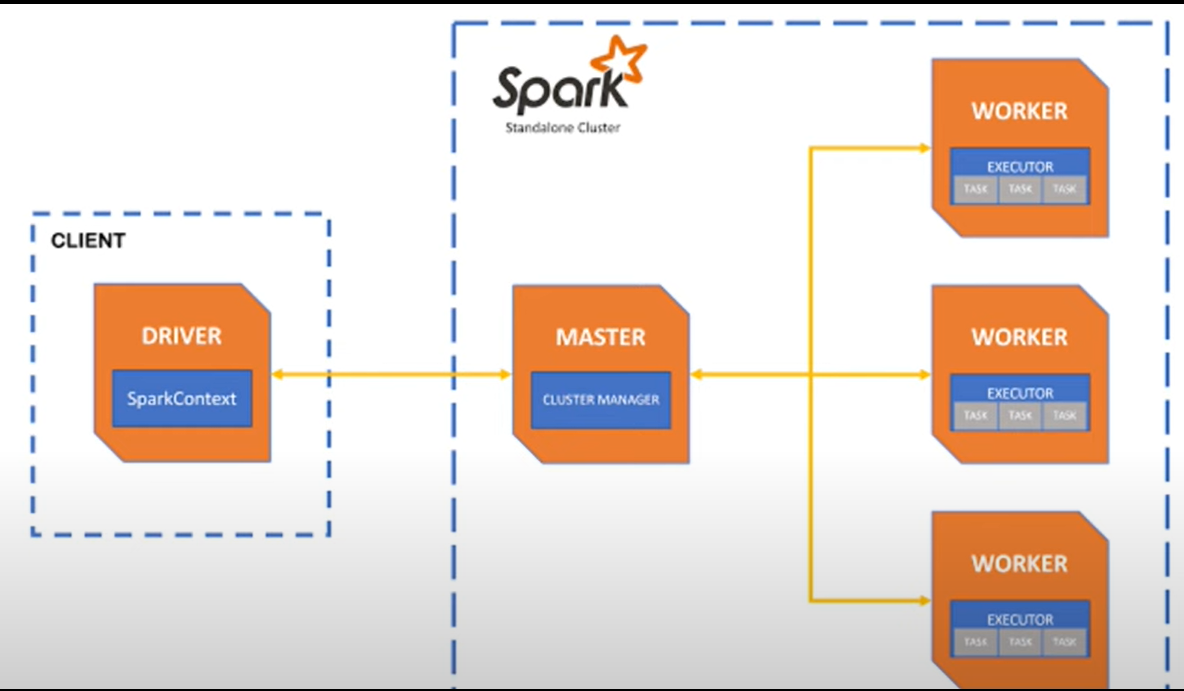

Aunque mapreduce era eficaz para el procesamiento de volumenes altos de datos en Cluster distribuidos tenia algunas limitaciones importantes, especialmente en terminos de rendimiento y facilidad. Spark esta diseñado para ofrecer un procesamiento de datos  rapido mediante el uso de MEMORIA RAM para almacenar datos en lugar de depender del acceso A DISCO que es mas lento

Spak optimiza las operaciones mediante la ejecucion de tareas en memoria siempre que sea posible  lo que reduce significativamente los tiempoes de ejecucion

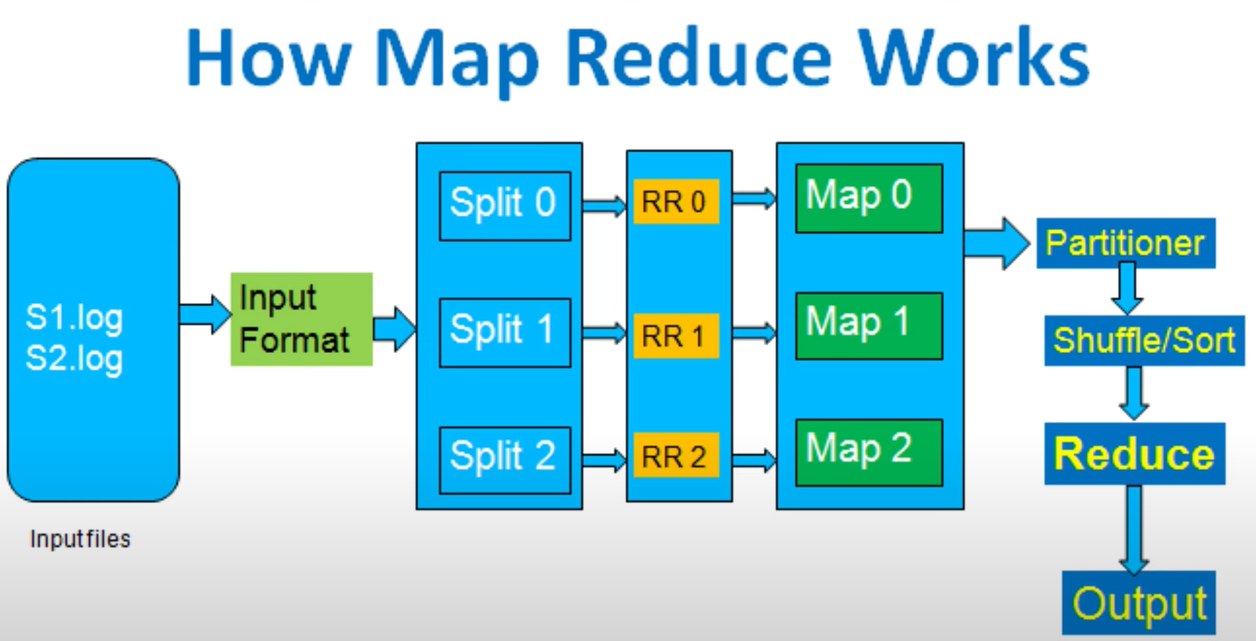

Apache Spark es de codigo abierto y la contribución de la comunidad ha sido fundamental para el éxito y su adolpacion generalizada en el campo del Analisis de Datos.


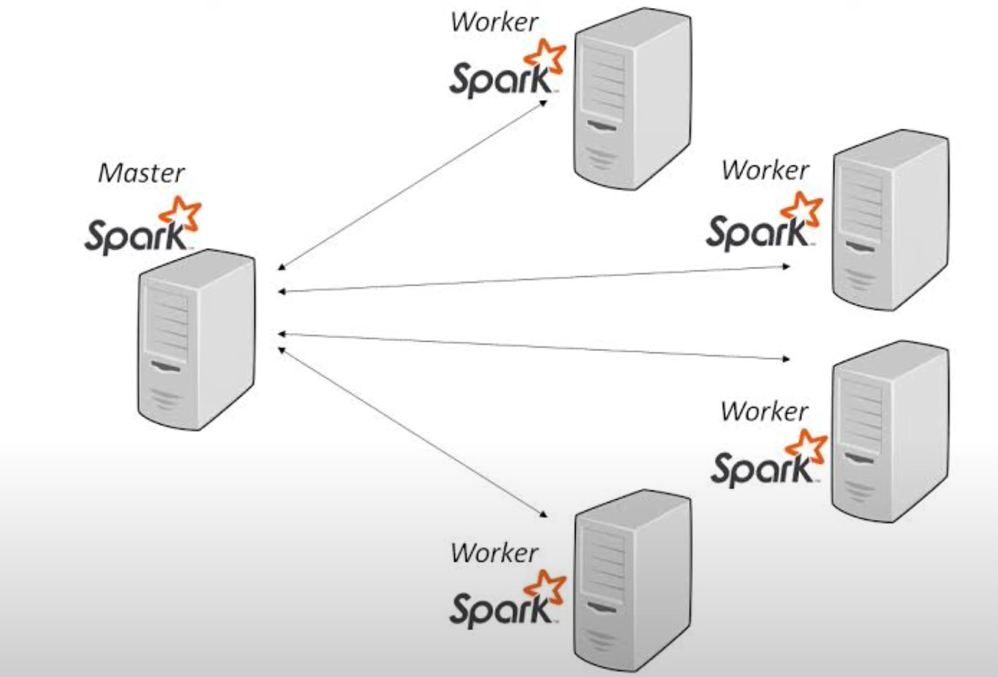

Pyspark proporciona a los desarrolladores de python un interfaz amigable para trabajar con SPARK.
Pyspark es la intefaz de python para apache Spark.

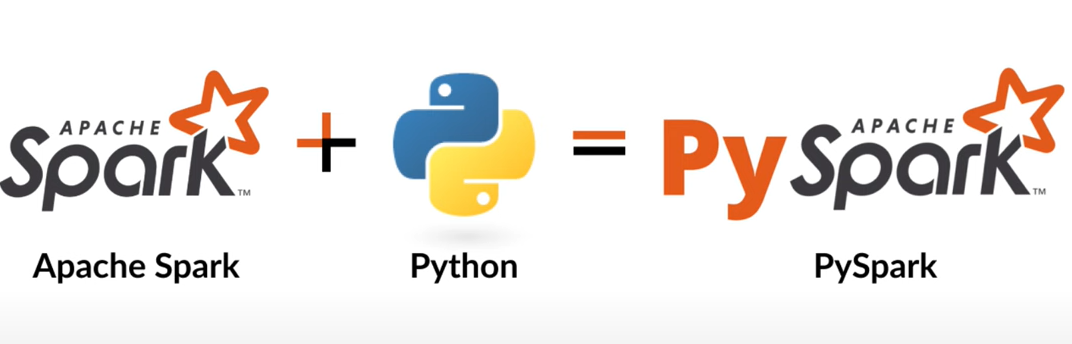

### 

# PRACTICA DE PySpark